In [1]:
# Convolutional Neural Network

# Installing Theano
# pip install --upgrade --no-deps git+git://github.com/Theano/Theano.git

# Installing Tensorflow
# Install Tensorflow from the website: https://www.tensorflow.org/versions/r0.12/get_started/os_setup.html

# Installing Keras
# pip install --upgrade keras

# Part 1 - Building the CNN

# Importing the Keras libraries and packages
import numpy as np
import os
import keras_metrics
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import TimeDistributed
from keras.layers import LSTM
from keras.layers import Reshape

import warnings
warnings.filterwarnings('ignore')

# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Convolution2D(64, (3, 3), padding = 'same', input_shape = (128, 128, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Convolution2D(64, (3, 3), padding = 'same', activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a third conolutional layer
classifier.add(Convolution2D(64, (3, 3), padding = 'same', activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())
classifier.add(Dropout(rate = 0.5))

# Step 4 - Full connection
classifier.add(Reshape((4*4, 1024)))
classifier.add(LSTM(units = 50, return_sequences = True, dropout = 0.5))
classifier.add(LSTM(units = 20, return_sequences = False, dropout = 0.5))
classifier.add(Dense(output_dim = 7, activation = 'softmax'))

classifier.summary()

Z:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)             0         
__________

In [2]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy', keras_metrics.precision(), keras_metrics.recall()])

In [3]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   height_shift_range =  0.1,
                                   width_shift_range = 0.1,
                                   channel_shift_range = 10)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('train/',
                                                 target_size = (128, 128),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('test/',
                                            target_size = (128, 128),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 399 images belonging to 7 classes.
Found 136 images belonging to 7 classes.


In [4]:
results = classifier.fit_generator(training_set,
                         samples_per_epoch = 399,
                         nb_epoch = 100,
                         validation_data = test_set,
                         nb_val_samples = 136)

Epoch 1/100
12/12 [==============================] - 49s 4s/step - loss: 1.9143 - acc: 0.2069 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.9084 - val_acc: 0.2362 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
12/12 [==============================] - 48s 4s/step - loss: 1.9038 - acc: 0.2474 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.9125 - val_acc: 0.2352 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/100
12/12 [==============================] - 48s 4s/step - loss: 1.9245 - acc: 0.2082 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.8963 - val_acc: 0.2354 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/100
12/12 [==============================] - 48s 4s/step - loss: 1.8978 - acc: 0.2461 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.8850 - val_acc: 0.2352 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/100
12/12 [==============================] - 50s 4s/step - loss: 1.8921 - ac

Epoch 39/100
12/12 [==============================] - 49s 4s/step - loss: 1.1499 - acc: 0.5369 - precision: 0.6367 - recall: 0.3328 - val_loss: 1.0348 - val_acc: 0.6021 - val_precision: 0.7006 - val_recall: 0.4627
Epoch 40/100
12/12 [==============================] - 48s 4s/step - loss: 1.1196 - acc: 0.5577 - precision: 0.6897 - recall: 0.3481 - val_loss: 1.0275 - val_acc: 0.5805 - val_precision: 0.7443 - val_recall: 0.4916
Epoch 41/100
12/12 [==============================] - 48s 4s/step - loss: 1.2230 - acc: 0.5127 - precision: 0.6754 - recall: 0.3374 - val_loss: 1.1126 - val_acc: 0.5953 - val_precision: 0.7604 - val_recall: 0.4406
Epoch 42/100
12/12 [==============================] - 77s 6s/step - loss: 1.1502 - acc: 0.5578 - precision: 0.7049 - recall: 0.3537 - val_loss: 1.1024 - val_acc: 0.6037 - val_precision: 0.6448 - val_recall: 0.3755
Epoch 43/100
12/12 [==============================] - 81s 7s/step - loss: 1.1827 - acc: 0.5365 - precision: 0.6768 - recall: 0.3584 - val_loss: 

12/12 [==============================] - 163s 14s/step - loss: 0.8919 - acc: 0.6754 - precision: 0.7766 - recall: 0.5624 - val_loss: 1.0347 - val_acc: 0.6533 - val_precision: 0.6960 - val_recall: 0.5729
Epoch 78/100
12/12 [==============================] - 164s 14s/step - loss: 0.9409 - acc: 0.6049 - precision: 0.6971 - recall: 0.5001 - val_loss: 1.0664 - val_acc: 0.6169 - val_precision: 0.6485 - val_recall: 0.5146
Epoch 79/100
12/12 [==============================] - 155s 13s/step - loss: 0.8490 - acc: 0.6573 - precision: 0.7209 - recall: 0.5341 - val_loss: 0.9413 - val_acc: 0.6625 - val_precision: 0.7444 - val_recall: 0.5964
Epoch 80/100
12/12 [==============================] - 161s 13s/step - loss: 0.9385 - acc: 0.6441 - precision: 0.7113 - recall: 0.5527 - val_loss: 0.9845 - val_acc: 0.6180 - val_precision: 0.6900 - val_recall: 0.5732
Epoch 81/100
12/12 [==============================] - 160s 13s/step - loss: 0.8797 - acc: 0.7040 - precision: 0.7817 - recall: 0.5810 - val_loss: 0.9

In [10]:
test_steps_per_epoch = np.math.ceil(test_set.samples / test_set.batch_size)
predictions = classifier.predict_generator(test_set, steps=test_steps_per_epoch)
predicted_classes = np.argmax(predictions, axis=1)

In [11]:
true_classes = test_set.classes
class_labels = list(test_set.class_indices.keys())   

In [12]:
import sklearn.metrics as metrics
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report) 

             precision    recall  f1-score   support

      anger       0.21      0.16      0.18        32
    boredom       0.15      0.10      0.12        21
    disgust       0.08      0.08      0.08        12
       fear       0.00      0.00      0.00        17
  happiness       0.11      0.17      0.13        18
    neutral       0.27      0.35      0.30        20
    sadness       0.12      0.12      0.12        16

avg / total       0.15      0.15      0.14       136



Confusion matrix, without normalization
[[5 4 1 6 5 6 5]
 [6 2 2 2 5 2 2]
 [0 1 1 2 5 1 2]
 [6 1 1 0 4 4 1]
 [4 2 1 3 3 2 3]
 [2 0 6 0 3 7 2]
 [1 3 1 3 2 4 2]]


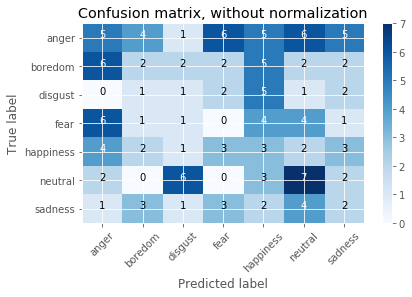

Normalized confusion matrix
[[15.625  12.5     3.125  18.75   15.625  18.75   15.625 ]
 [28.5714  9.5238  9.5238  9.5238 23.8095  9.5238  9.5238]
 [ 0.      8.3333  8.3333 16.6667 41.6667  8.3333 16.6667]
 [35.2941  5.8824  5.8824  0.     23.5294 23.5294  5.8824]
 [22.2222 11.1111  5.5556 16.6667 16.6667 11.1111 16.6667]
 [10.      0.     30.      0.     15.     35.     10.    ]
 [ 6.25   18.75    6.25   18.75   12.5    25.     12.5   ]]


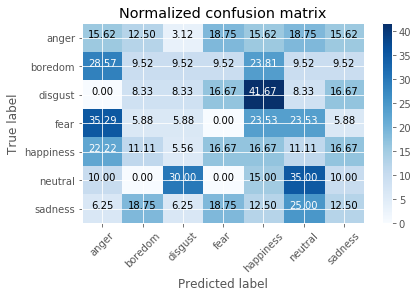

In [13]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize=True.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]*100
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap, aspect = 'auto')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(true_classes, predicted_classes)
np.set_printoptions(precision=4)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_labels,
                      title='Confusion matrix, without normalization')
plt.savefig("non_normalized_confusion_matrix_cnn_lstm.png")
plt.show()
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_labels, normalize=True,
                      title='Normalized confusion matrix')
plt.savefig("normalized_confusion_matrix_cnn_lstm.png")
plt.show()

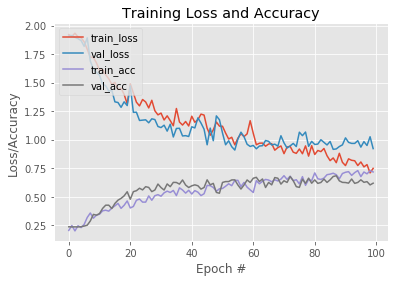

In [14]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.figure()
N = 100
plt.plot(np.arange(0, N), results.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), results.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), results.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), results.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")
plt.savefig("plot_cnn_lstm.png")